# Diseño de zapata aislada

In [98]:
#Importar las librerías necesarias
%load_ext autoreload
%autoreload 2
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from utils import concreto_utils as conc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
# Definicion de las unidades
N = 1
m = 1
cm = m/100
Pa = 1
MPa = 10**6*Pa
pulg = 2.54 *cm
kN = 1000*N
kgf = 9.80665*N
tonf = 1000*kgf
ft = 12*pulg
ksi = 6894757.2932*Pa
kip = ksi*pulg**2
psi = 6894.76*Pa

In [100]:
# Definicion de varillas de acero:
d_3 = 3/8 * pulg
d_4 = 1/4 * pulg
d_5 = 5/8 * pulg
d_6 = 3/4 * pulg
d_8 = 1 * pulg

A_3 = d_3 ** 2 /4 * math.pi
A_4 = d_4 ** 2 /4 * math.pi
A_5 = d_5 ** 2 /4 * math.pi
A_6 = d_6 ** 2 /4 * math.pi
A_8 = d_8 ** 2 /4 * math.pi

#Diccionario con los diametros y areas de las varillas:
bar_dic={'3/8"':[d_3,A_3],'1/2"':[d_4,A_4],'5/8"':[d_5,A_5],
         '3/4"':[d_6,A_6],'1"':[d_8,A_8]}

# Insertando datos a la instancia

Cada sublista de la lista de fuerzas (Fzas) representan las fuerzas correspondientes a cada patron de carga: Fzas=[[D],[L],[Sx],[Sy],[Vx],[Vy]]
Adicionalmente durante el proceso de dimensionamiento a esta matriz de fuerzas se la anexiona una lista proveniente del peso propio de la zapata más el peso del terreno por encima de la zapata, quedando: Fzas=[[D],[L],[Sx],[Sy],[Vx],[Vy],[Pp]]

In [101]:
#La lista que contiene todas las fuerzas:

#El orden de la fuerzas es el siguiente: [Fz,Mx,My]
Fzas=[[80*tonf,20*tonf,20*tonf],
         [50*tonf,10*tonf,10*tonf],
         [10*tonf,5*tonf,20*tonf],
         [15*tonf,30*tonf,7*tonf],
         [0,0,0],
         [0,0,0]]

In [102]:
#Datos de la columna:
b_col=0.6*m
h_col=0.6*m

#Datos del suelo
q_adm=4.0*kgf/cm**2 #presion admisible del suelo.
γ_s = 1.8*kgf/m**3


#Datos de la zapata
h=0.6*m             #altura predefinida de la zapata.
Df=1.8*m            #profundidad de desplante de la zapata. (desde el NTN al NFC).

In [103]:
#Insertando los datos a la clase zapata 1:
Z1=conc.Isolate_footing(b_col,h_col,Df,h)
Z1.set_soil(q_adm,γ_s)
Z1.assign_forces(Fzas)
Z1.soil_forces()

# Predimensionamiento de la zapata

In [104]:
print("Ancho de la zapata: B=",Z1.B,"m")
print("Longitud de la zapata: L=",Z1.L,"m")
print("Longitud de volados: Lv1=",Z1.Lv1,"m Lv2=",Z1.Lv2,"m")
print("Area total de la zapata: ",Z1.B*Z1.L,"m2")
print("Cargas: ")
cargas=pd.DataFrame(Z1.forces)
cargas.columns=['Fz','Mx','My']
cargas.index=['D','L','Sx','Sy','Vx','Vy','Pp']
print("El peso propio de la zapata se autocalculará dependiendo de las iteraciones.")
cargas/tonf

Ancho de la zapata: B= 2.4 m
Longitud de la zapata: L= 2.4 m
Longitud de volados: Lv1= 0.8999999999999999 m Lv2= 0.8999999999999999 m
Area total de la zapata:  5.76 m2
Cargas: 
El peso propio de la zapata se autocalculará dependiendo de las iteraciones.


,Fz,Mx,My
D,80.000000,20.0,20.0
L,50.000000,10.0,10.0
Sx,10.000000,5.0,20.0
Sy,15.000000,30.0,7.0
Vx,0.000000,0.0,0.0
Vy,0.000000,0.0,0.0
Pp,0.020998,0.0,0.0


In [105]:
#Se dimensionará la zapata para obtener los valores de B y L:
Z1.foot_sizing()
print("B=",Z1.B,"m, L=",Z1.L,"m.")

B= 3.8 m, L= 3.8 m.


# Verificación de presiones: 

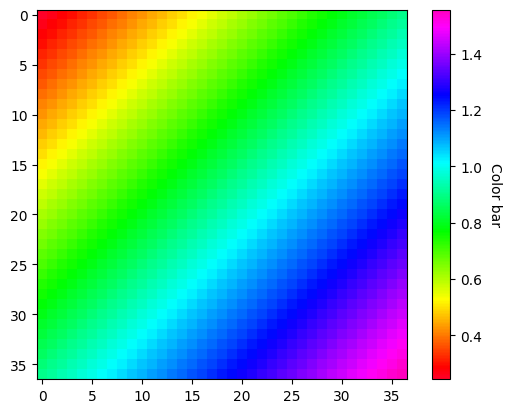

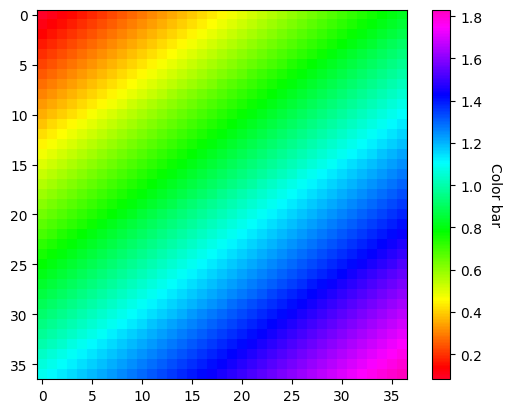

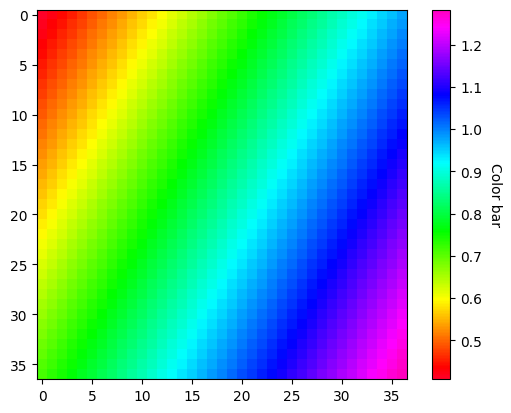

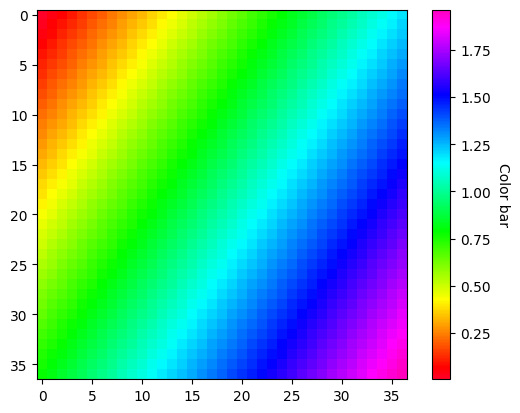

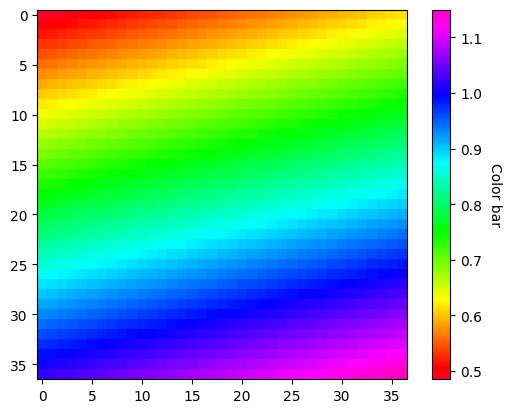

In [106]:
Z1.total_pressures(n=0.1,nc=0,und=kgf/cm**2)
Z1.total_pressures(n=0.1,nc=1,und=kgf/cm**2)
Z1.total_pressures(n=0.1,nc=2,und=kgf/cm**2)
Z1.total_pressures(n=0.1,nc=3,und=kgf/cm**2)
Z1.total_pressures(n=0.1,nc=4,und=kgf/cm**2)

In [107]:
print("La presion máxima por cargas de gravedad es: ",round(Z1.σ_max_g/(kgf/cm**2),2),"kgf/cm**2")
print("La presion máxima por cargas de gravedad más sismo es: ",round(Z1.σ_max_sismo/(kgf/cm**2),2),"kgf/cm**2")


La presion máxima por cargas de gravedad es:  1.56 kgf/cm**2
La presion máxima por cargas de gravedad más sismo es:  1.96 kgf/cm**2


# Diseño por cortante

In [108]:
Z1.shear_design()
print("El esfuerzo ultimo es: ",round(Z1.σ_U,2),"Pa")
print("El nuevo peralte será: ",round(Z1.h,2),"m")
print("Cortante última: ",round(Z1.V_u,2),"N")
print("Cortante resistente del concreto Ø=0.85: ",round(Z1.phi_Vn,2),"N")

El esfuerzo ultimo es:  240689.02 Pa
El nuevo peralte será:  0.6 m
Cortante última:  258740.7 N
Cortante resistente del concreto Ø=0.85:  347645.65 N


# Diseño por punzonamiento

In [109]:
Z1.punch_design()
print("La cortante por punzonamiento es: ",round(Z1.Vu_p,2),"N")
print("La cortante resistente en dos direcciones Ø=0.85: ",round(Z1.phi_Vn_p,2),"N")
print("El nuevo peralte será: ",round(Z1.h,2),"m")

La cortante por punzonamiento es:  3293371.99 N
La cortante resistente en dos direcciones Ø=0.85:  3466757.47 N
El nuevo peralte será:  0.85 m


# Diseño por flexión

In [110]:
Z1.flex_design()
print("El momento ultimo es: ",round(Z1.Mu,2),"N-m")
print("Las posibles distribuciones de acero son: ")
for i in range(len(Z1.set_diseño)):
    print("Ø",Z1.set_diseño[i][0]," @",Z1.set_diseño[i][1]/cm,"cm ØMn=",round(Z1.set_diseño[i][2],2),"N-m")

El momento ultimo es:  385102.44 N-m
Las posibles distribuciones de acero son: 
Ø 3/8"  @ 5.0 cm ØMn= 417035.79 N-m
Ø 5/8"  @ 15.0 cm ØMn= 404670.94 N-m
Ø 5/8"  @ 12.5 cm ØMn= 462481.07 N-m
Ø 3/4"  @ 20.0 cm ØMn= 415681.02 N-m
Ø 1"  @ 40.0 cm ØMn= 441894.49 N-m
Ø 1"  @ 35.0 cm ØMn= 441894.49 N-m
